In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sn
import time

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
number_of_classes = 10;
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
random_number = np.random.randint(1e9)
np.random.seed(random_number)
permutation = np.random.choice(range(train_images.shape[0]), train_images.shape[0], False)
data_X = train_images[permutation]
data_Y = train_labels[permutation]

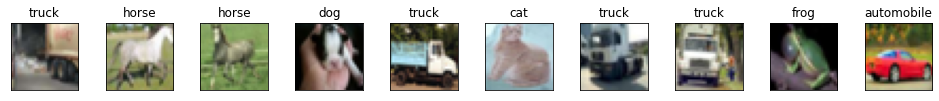

In [ ]:
plt.rcParams['figure.figsize'] = [16, 2]
fig = plt.figure()
for i in range(10):
  ax = fig.add_subplot(1, 10, i+1)
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  ax.set_title(class_names[data_Y[i][0]], fontsize=12)
  plt.imshow(data_X[i])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

In [ ]:
X_train = data_X[0:40960]
print('X_train =', X_train.shape)
Y_train = data_Y[0:40960]
print('Y_train =', Y_train.shape)
X_validation = data_X[40960:50000]
print('X_validation =', X_validation.shape)
Y_validation = data_Y[40960:50000]
print('Y_validation =', Y_validation.shape)
X_test = test_images
print('X_test =', X_test.shape)
Y_test = test_labels
print('Y_test =', Y_test.shape)

X_train = (40960, 32, 32, 3)
Y_train = (40960, 1)
X_validation = (9040, 32, 32, 3)
Y_validation = (9040, 1)
X_test = (10000, 32, 32, 3)
Y_test = (10000, 1)


In [ ]:
normalized_X_train = (X_train - np.mean(X_train, axis=0)) / (1e-3 + np.sqrt(np.var(X_train, axis=0)))
normalized_X_validation = (X_validation- np.mean(X_train, axis=0)) / (1e-3 + np.sqrt(np.var(X_train, axis=0)))
normalized_X_test = (X_test - np.mean(X_train, axis=0)) / (1e-3 + np.sqrt(np.var(X_train, axis=0)))
Y_train_one_hot = tf.one_hot(Y_train[:, 0], number_of_classes)
print('Y_train_one_hot.shape: ', Y_train_one_hot.shape)
Y_validation_one_hot = tf.one_hot(Y_validation[:, 0], number_of_classes)
print('Y_validation_one_hot.shape: ', Y_validation_one_hot.shape)
Y_test_one_hot = tf.one_hot(Y_test[:, 0], number_of_classes)
print('Y_test_one_hot.shape: ', Y_test_one_hot.shape)

Y_train_one_hot.shape:  (40960, 10)
Y_validation_one_hot.shape:  (9040, 10)
Y_test_one_hot.shape:  (10000, 10)


A) Batch Size = 32

In [ ]:
input_shape = (32, 32, 3)
hidden_layer_1_size = 1024
hidden_layer_2_size = 256
output_size = number_of_classes
batch_size = 32
number_of_epochs = 50

In [ ]:
model = tf.keras.models.Sequential(name='batch_size_32')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(hidden_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dense(hidden_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "batch_size_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 1024)              3146752   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               262400    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                     

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/batch_size_32')

Epoch 1/50
1280/1280 [==============================] - 10s 7ms/step - loss: 2.0061 - accuracy: 0.3004 - val_loss: 1.6239 - val_accuracy: 0.4176 - lr: 0.2439
Epoch 2/50
1280/1280 [==============================] - 8s 6ms/step - loss: 1.7219 - accuracy: 0.3795 - val_loss: 1.5519 - val_accuracy: 0.4460 - lr: 0.2380
Epoch 3/50
1280/1280 [==============================] - 8s 6ms/step - loss: 1.6511 - accuracy: 0.4053 - val_loss: 1.4934 - val_accuracy: 0.4644 - lr: 0.2321
Epoch 4/50
1280/1280 [==============================] - 9s 7ms/step - loss: 1.6058 - accuracy: 0.4258 - val_loss: 1.4599 - val_accuracy: 0.4775 - lr: 0.2265
Epoch 5/50
1280/1280 [==============================] - 8s 6ms/step - loss: 1.5714 - accuracy: 0.4381 - val_loss: 1.4404 - val_accuracy: 0.4787 - lr: 0.2210
Epoch 6/50
1280/1280 [==============================] - 8s 7ms/step - loss: 1.5438 - accuracy: 0.4497 - val_loss: 1.4285 - val_accuracy: 0.4888 - lr: 0.2156
Epoch 7/50
1280/1280 [==============================] - 8

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/batch_size_32/history.csv', mode='w') as f:
    hist_df.to_csv(f)

A) Batch Size = 64

In [ ]:
input_shape = (32, 32, 3)
hidden_layer_1_size = 1024
hidden_layer_2_size = 256
output_size = number_of_classes
batch_size = 64
number_of_epochs = 50

In [ ]:
model = tf.keras.models.Sequential(name='batch_size_64')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(hidden_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dense(hidden_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "batch_size_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 1024)              3146752   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               262400    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                     

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/batch_size_64')

Epoch 1/50
640/640 [==============================] - 6s 8ms/step - loss: 1.9734 - accuracy: 0.3089 - val_loss: 1.6236 - val_accuracy: 0.4136 - lr: 0.2439
Epoch 2/50
640/640 [==============================] - 5s 7ms/step - loss: 1.7321 - accuracy: 0.3798 - val_loss: 1.5280 - val_accuracy: 0.4475 - lr: 0.2380
Epoch 3/50
640/640 [==============================] - 5s 7ms/step - loss: 1.6300 - accuracy: 0.4166 - val_loss: 1.4618 - val_accuracy: 0.4772 - lr: 0.2321
Epoch 4/50
640/640 [==============================] - 4s 7ms/step - loss: 1.5711 - accuracy: 0.4374 - val_loss: 1.4375 - val_accuracy: 0.4858 - lr: 0.2265
Epoch 5/50
640/640 [==============================] - 5s 7ms/step - loss: 1.5276 - accuracy: 0.4521 - val_loss: 1.4143 - val_accuracy: 0.4878 - lr: 0.2210
Epoch 6/50
640/640 [==============================] - 5s 7ms/step - loss: 1.4846 - accuracy: 0.4662 - val_loss: 1.3790 - val_accuracy: 0.5070 - lr: 0.2156
Epoch 7/50
640/640 [==============================] - 5s 7ms/step - lo

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/batch_size_64/history.csv', mode='w') as f:
    hist_df.to_csv(f)

A) Batch Size = 256

In [ ]:
input_shape = (32, 32, 3)
hidden_layer_1_size = 1024
hidden_layer_2_size = 256
output_size = number_of_classes
batch_size = 256
number_of_epochs = 50

In [ ]:
model = tf.keras.models.Sequential(name='batch_size_256')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(hidden_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dense(hidden_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "batch_size_256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 1024)              3146752   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               262400    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                    

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/batch_size_256')

Epoch 1/50
160/160 [==============================] - 3s 14ms/step - loss: 1.9152 - accuracy: 0.3314 - val_loss: 1.5778 - val_accuracy: 0.4388 - lr: 0.2439
Epoch 2/50
160/160 [==============================] - 2s 11ms/step - loss: 1.6837 - accuracy: 0.3950 - val_loss: 1.5038 - val_accuracy: 0.4650 - lr: 0.2380
Epoch 3/50
160/160 [==============================] - 2s 12ms/step - loss: 1.6115 - accuracy: 0.4218 - val_loss: 1.4641 - val_accuracy: 0.4772 - lr: 0.2321
Epoch 4/50
160/160 [==============================] - 2s 11ms/step - loss: 1.5635 - accuracy: 0.4399 - val_loss: 1.4238 - val_accuracy: 0.4888 - lr: 0.2265
Epoch 5/50
160/160 [==============================] - 2s 11ms/step - loss: 1.5237 - accuracy: 0.4524 - val_loss: 1.4032 - val_accuracy: 0.4941 - lr: 0.2210
Epoch 6/50
160/160 [==============================] - 2s 10ms/step - loss: 1.4892 - accuracy: 0.4654 - val_loss: 1.3815 - val_accuracy: 0.5029 - lr: 0.2156
Epoch 7/50
160/160 [==============================] - 2s 10ms/st

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/batch_size_256/history.csv', mode='w') as f:
    hist_df.to_csv(f)

The larger the batch size, the faster the algorithm convergence, the greater the accuracy, and the shorter the training time.

B) Activation Function = Tanh

In [ ]:
input_shape = (32, 32, 3)
hidden_layer_1_size = 2048
hidden_layer_2_size = 512
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='activation_function_tanh')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(hidden_layer_1_size, activation='tanh', name='hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dense(hidden_layer_2_size, activation='tanh', name='hidden_layer_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "activation_function_tanh"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 2048)              6293504   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 hidden_layer_2 (Dense)      (None, 512)               1049088   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                          

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/activation_function_tanh')

Epoch 1/100
160/160 [==============================] - 3s 16ms/step - loss: 2.1016 - accuracy: 0.3032 - val_loss: 1.7718 - val_accuracy: 0.3789 - lr: 0.2439
Epoch 2/100
160/160 [==============================] - 2s 13ms/step - loss: 1.8391 - accuracy: 0.3541 - val_loss: 1.7050 - val_accuracy: 0.4124 - lr: 0.2380
Epoch 3/100
160/160 [==============================] - 2s 12ms/step - loss: 1.7765 - accuracy: 0.3802 - val_loss: 1.6766 - val_accuracy: 0.4198 - lr: 0.2321
Epoch 4/100
160/160 [==============================] - 3s 19ms/step - loss: 1.7389 - accuracy: 0.3938 - val_loss: 1.6659 - val_accuracy: 0.4228 - lr: 0.2265
Epoch 5/100
160/160 [==============================] - 4s 22ms/step - loss: 1.7048 - accuracy: 0.4055 - val_loss: 1.6411 - val_accuracy: 0.4369 - lr: 0.2210
Epoch 6/100
160/160 [==============================] - 3s 18ms/step - loss: 1.6733 - accuracy: 0.4204 - val_loss: 1.6399 - val_accuracy: 0.4342 - lr: 0.2156
Epoch 7/100
160/160 [==============================] - 3s 

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/activation_function_tanh/history.csv', mode='w') as f:
    hist_df.to_csv(f)

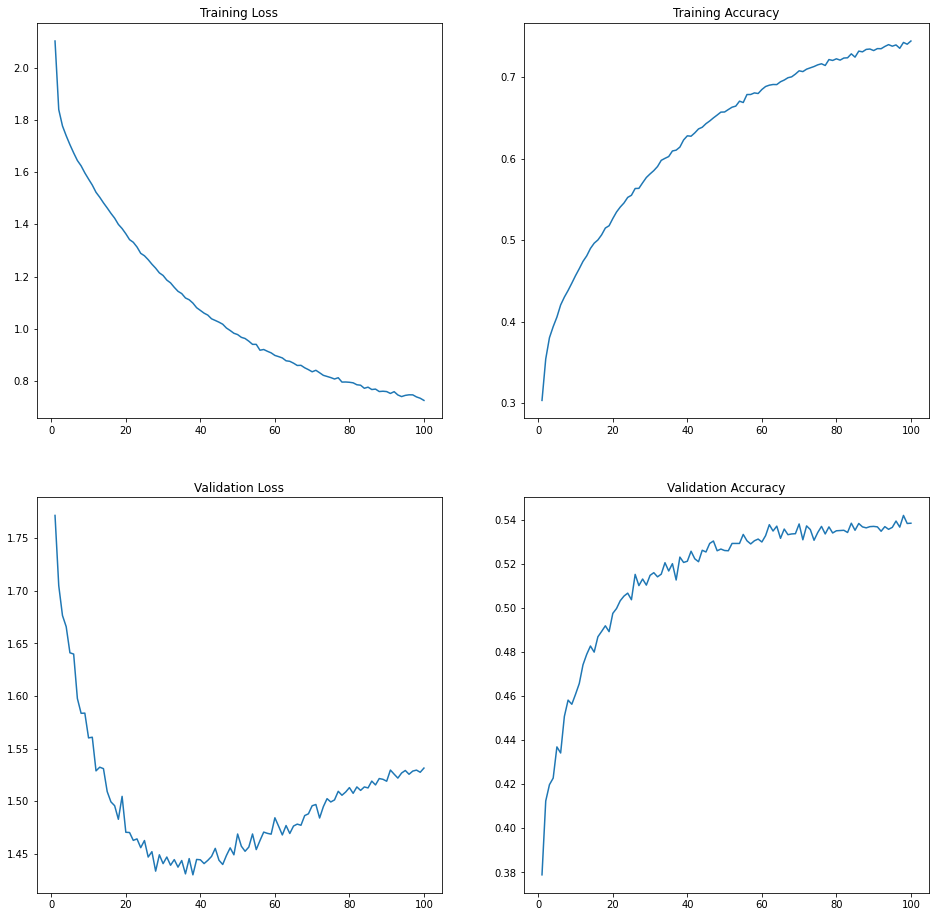

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/activation_function_tanh/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

313/313 [==============================] - 2s 7ms/step - loss: 1.5352 - accuracy: 0.5351
Test Loss =  1.535171627998352
Test Accuracy =  0.535099983215332


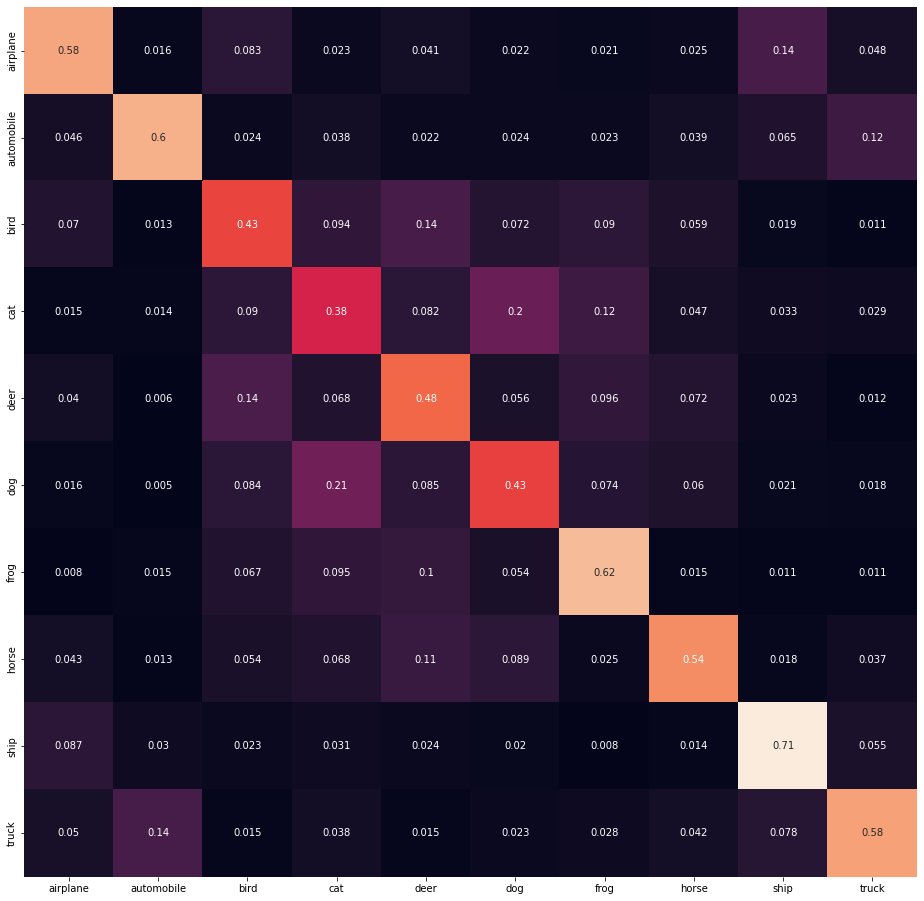

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/activation_function_tanh')
[test_loss, test_accuracy] = model.evaluate(normalized_X_test, Y_test_one_hot)
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
predicted_Y_test = model.predict(normalized_X_test)
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

B) Activation Function = ReLU

In [ ]:
input_shape = (32, 32, 3)
hidden_layer_1_size = 2048
hidden_layer_2_size = 512
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='activation_function_relu')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(hidden_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dense(hidden_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "activation_function_relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 2048)              6293504   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 hidden_layer_2 (Dense)      (None, 512)               1049088   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                          

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/activation_function_relu')

Epoch 1/100
160/160 [==============================] - 3s 16ms/step - loss: 1.9286 - accuracy: 0.3393 - val_loss: 1.5699 - val_accuracy: 0.4433 - lr: 0.2439
Epoch 2/100
160/160 [==============================] - 2s 13ms/step - loss: 1.6744 - accuracy: 0.4064 - val_loss: 1.5073 - val_accuracy: 0.4601 - lr: 0.2380
Epoch 3/100
160/160 [==============================] - 2s 13ms/step - loss: 1.6006 - accuracy: 0.4298 - val_loss: 1.4367 - val_accuracy: 0.4853 - lr: 0.2321
Epoch 4/100
160/160 [==============================] - 2s 12ms/step - loss: 1.5410 - accuracy: 0.4483 - val_loss: 1.4029 - val_accuracy: 0.4968 - lr: 0.2265
Epoch 5/100
160/160 [==============================] - 2s 13ms/step - loss: 1.4985 - accuracy: 0.4608 - val_loss: 1.3836 - val_accuracy: 0.5014 - lr: 0.2210
Epoch 6/100
160/160 [==============================] - 2s 13ms/step - loss: 1.4617 - accuracy: 0.4753 - val_loss: 1.3555 - val_accuracy: 0.5135 - lr: 0.2156
Epoch 7/100
160/160 [==============================] - 2s 

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/activation_function_relu/history.csv', mode='w') as f:
    hist_df.to_csv(f)

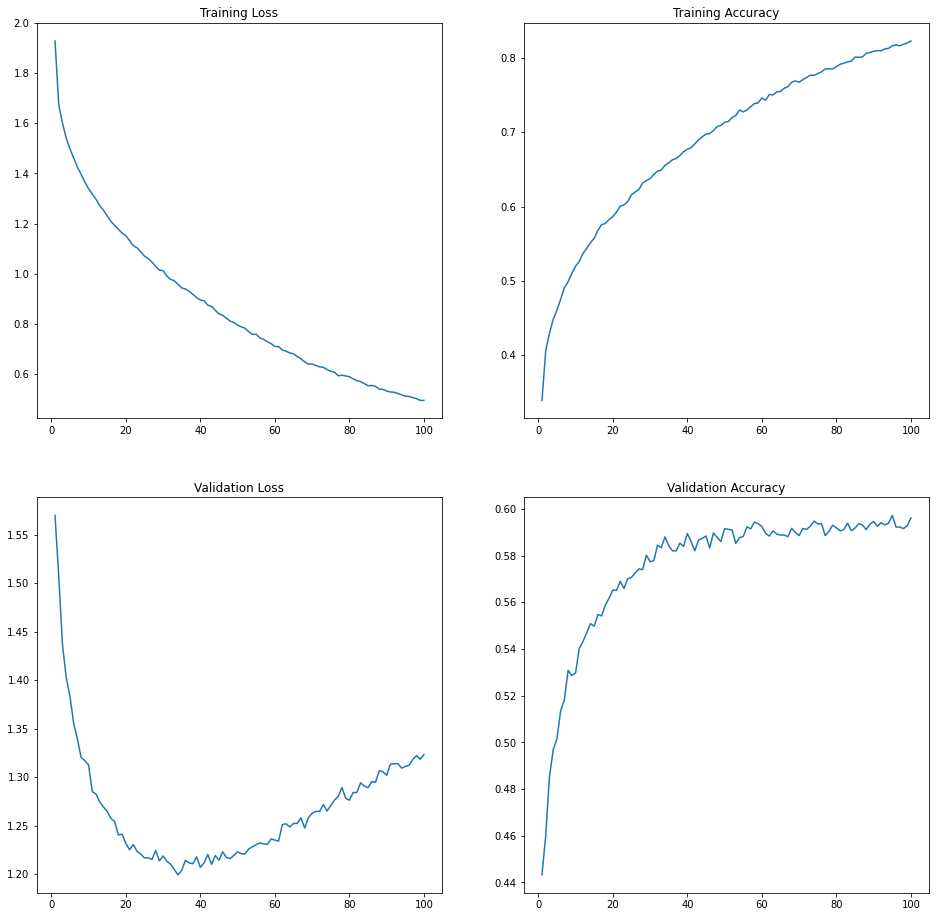

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/activation_function_relu/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

313/313 [==============================] - 2s 5ms/step - loss: 1.3361 - accuracy: 0.5858
Test Loss =  1.3361202478408813
Test Accuracy =  0.5857999920845032


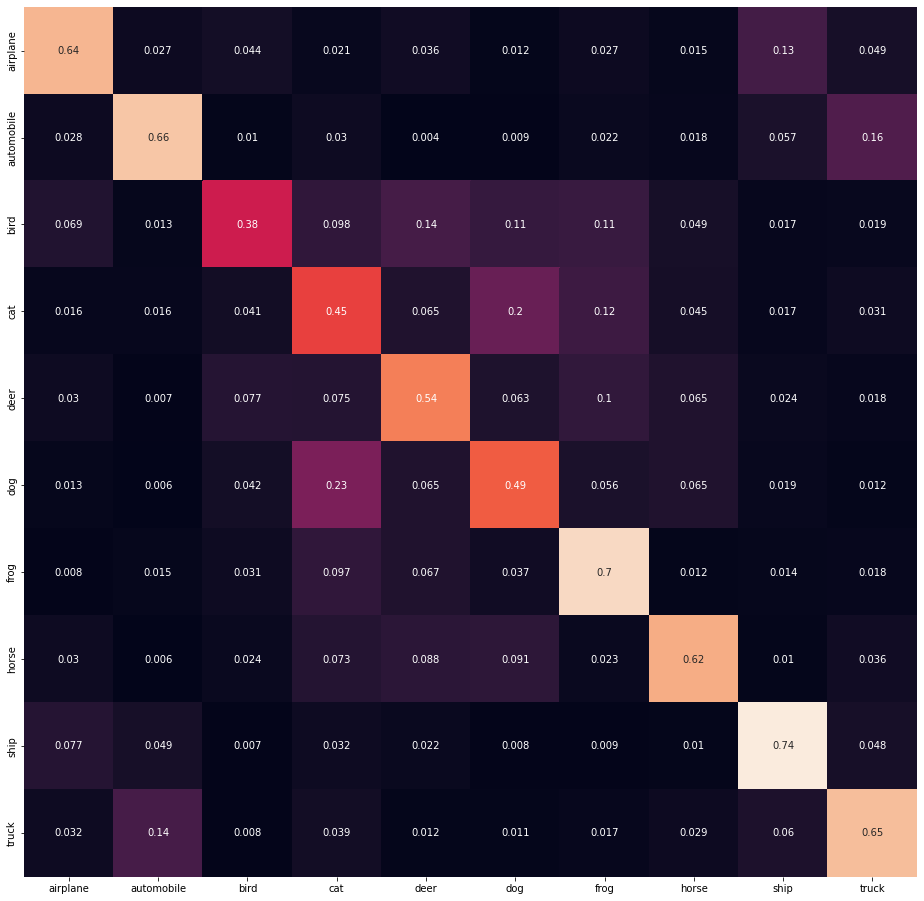

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/activation_function_relu')
[test_loss, test_accuracy] = model.evaluate(normalized_X_test, Y_test_one_hot)
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
predicted_Y_test = model.predict(normalized_X_test)
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

The model performs significantly better by using 'ReLU' activation functions. <br>
Tanh: <br>
Advantages -> 1. Its gradient is smooth, 2. Its output values are bounded, 3. It is zero at the origin <br>
Disadvantages -> 1. It has a vanishing gradient, 2. It is computationally expensive <br>
ReLU: <br>
Advantages -> 1. It is non-linear, 2. It is computationally efficient, 3. It is zero at the origin <br>
Disadvantages -> 1. It is inactive near the origin or at the negative numbers, 2. It is is not differentiable at origin

C) Loss Function = MSE

In [ ]:
input_shape = (32, 32, 3)
hidden_layer_1_size = 4096
hidden_layer_2_size = 1024
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='loss_function_MSE')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(hidden_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dense(hidden_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "loss_function_MSE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 4096)              12587008  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 4096)             16384     
 hNormalization)                                                 
                                                                 
 hidden_layer_2 (Dense)      (None, 1024)              4195328   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                 

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/loss_function_MSE')

Epoch 1/100
160/160 [==============================] - 4s 22ms/step - loss: 0.0944 - accuracy: 0.2302 - val_loss: 0.0760 - val_accuracy: 0.3829 - lr: 0.2439
Epoch 2/100
160/160 [==============================] - 3s 19ms/step - loss: 0.0858 - accuracy: 0.3190 - val_loss: 0.0727 - val_accuracy: 0.4232 - lr: 0.2380
Epoch 3/100
160/160 [==============================] - 3s 19ms/step - loss: 0.0822 - accuracy: 0.3510 - val_loss: 0.0709 - val_accuracy: 0.4394 - lr: 0.2321
Epoch 4/100
160/160 [==============================] - 3s 19ms/step - loss: 0.0795 - accuracy: 0.3725 - val_loss: 0.0696 - val_accuracy: 0.4492 - lr: 0.2265
Epoch 5/100
160/160 [==============================] - 3s 19ms/step - loss: 0.0776 - accuracy: 0.3893 - val_loss: 0.0689 - val_accuracy: 0.4567 - lr: 0.2210
Epoch 6/100
160/160 [==============================] - 3s 19ms/step - loss: 0.0759 - accuracy: 0.4047 - val_loss: 0.0681 - val_accuracy: 0.4635 - lr: 0.2156
Epoch 7/100
160/160 [==============================] - 3s 

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/loss_function_MSE/history.csv', mode='w') as f:
    hist_df.to_csv(f)

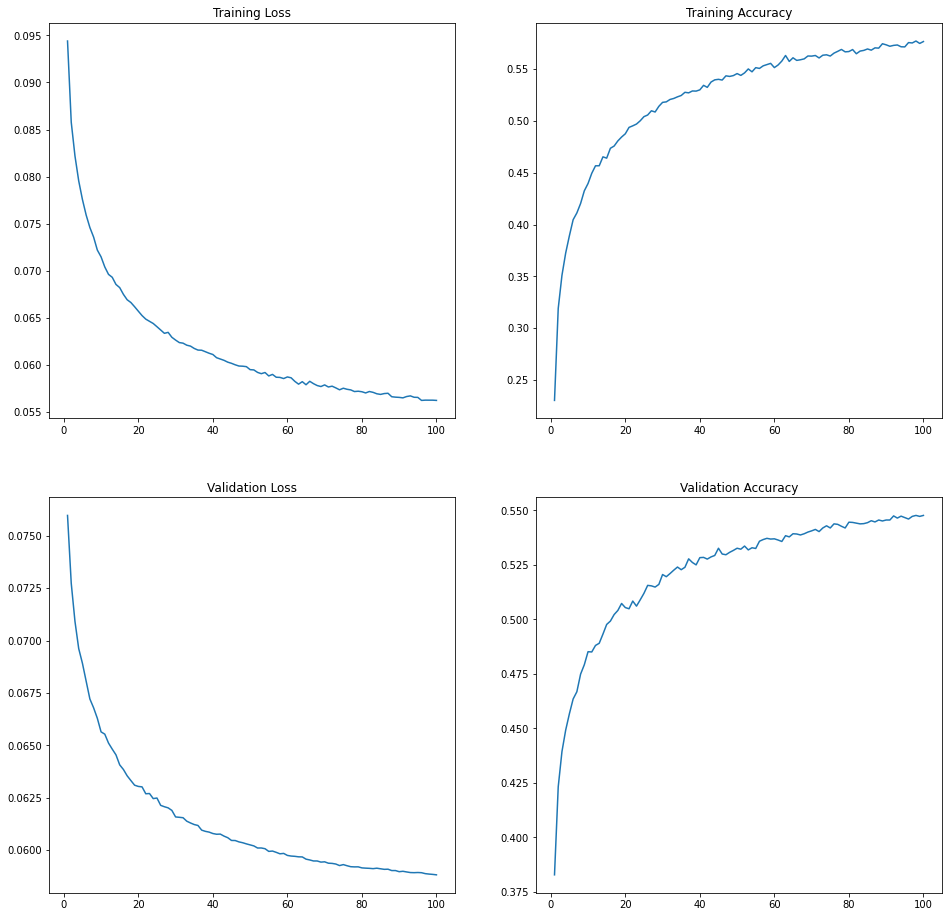

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/loss_function_MSE/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

313/313 [==============================] - 2s 6ms/step - loss: 0.0590 - accuracy: 0.5475
Test Loss =  0.05895209312438965
Test Accuracy =  0.5475000143051147


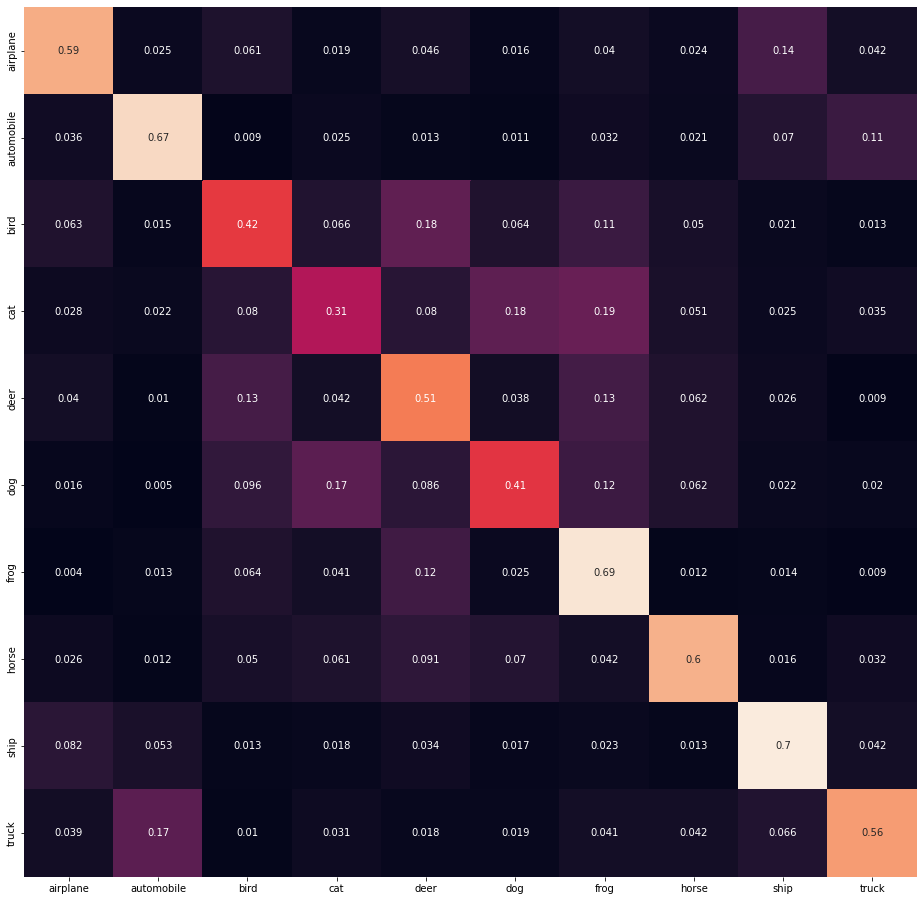

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/loss_function_MSE')
[test_loss, test_accuracy] = model.evaluate(normalized_X_test, Y_test_one_hot)
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
predicted_Y_test = model.predict(normalized_X_test)
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

C) Loss Function = Categorical Crossentropy

In [ ]:
input_shape = (32, 32, 3)
hidden_layer_1_size = 4096
hidden_layer_2_size = 1024
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='loss_function_categorical_crossentrpy')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(hidden_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dense(hidden_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "loss_function_categorical_crossentrpy"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 4096)              12587008  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 4096)             16384     
 hNormalization)                                                 
                                                                 
 hidden_layer_2 (Dense)      (None, 1024)              4195328   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                             

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/loss_function_categorical_crossentrpy')

Epoch 1/100
160/160 [==============================] - 4s 23ms/step - loss: 2.0819 - accuracy: 0.3308 - val_loss: 1.6868 - val_accuracy: 0.4291 - lr: 0.2439
Epoch 2/100
160/160 [==============================] - 3s 20ms/step - loss: 1.7514 - accuracy: 0.3964 - val_loss: 1.5671 - val_accuracy: 0.4450 - lr: 0.2380
Epoch 3/100
160/160 [==============================] - 3s 20ms/step - loss: 1.6599 - accuracy: 0.4228 - val_loss: 1.5081 - val_accuracy: 0.4649 - lr: 0.2321
Epoch 4/100
160/160 [==============================] - 3s 20ms/step - loss: 1.5928 - accuracy: 0.4434 - val_loss: 1.4605 - val_accuracy: 0.4836 - lr: 0.2265
Epoch 5/100
160/160 [==============================] - 3s 20ms/step - loss: 1.5342 - accuracy: 0.4621 - val_loss: 1.4178 - val_accuracy: 0.4938 - lr: 0.2210
Epoch 6/100
160/160 [==============================] - 3s 20ms/step - loss: 1.4793 - accuracy: 0.4781 - val_loss: 1.3627 - val_accuracy: 0.5198 - lr: 0.2156
Epoch 7/100
160/160 [==============================] - 3s 

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/loss_function_categorical_crossentrpy/history.csv', mode='w') as f:
    hist_df.to_csv(f)

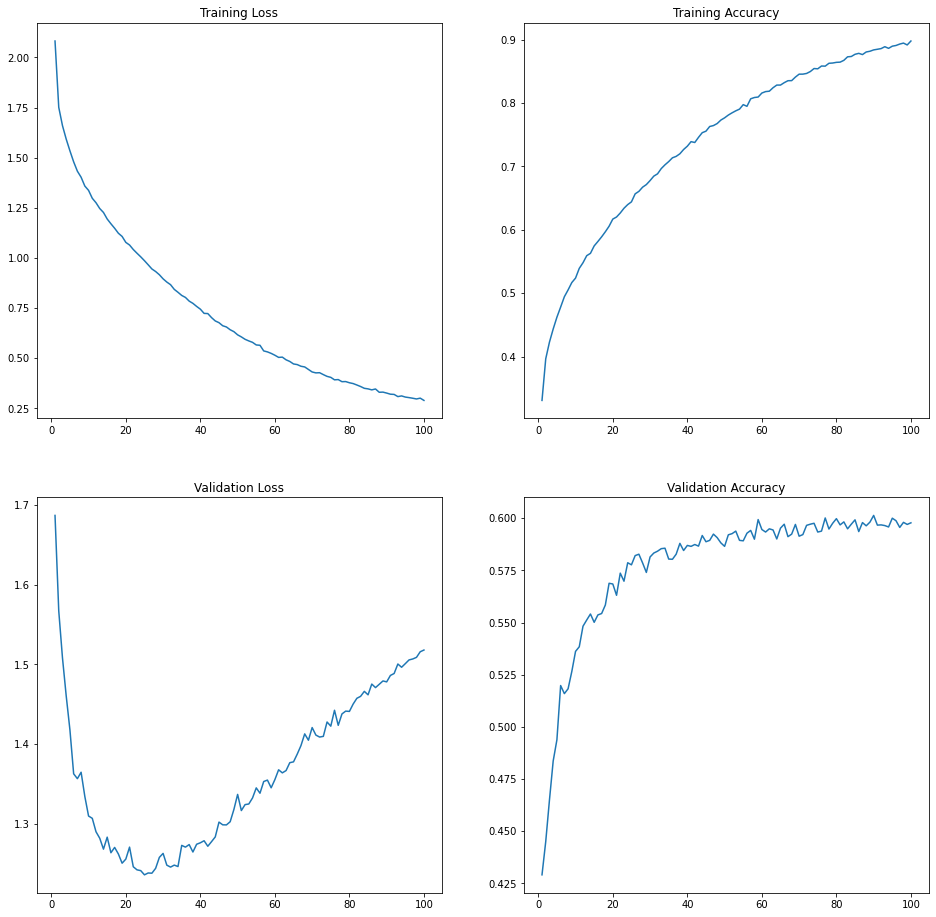

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/loss_function_categorical_crossentrpy/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

313/313 [==============================] - 2s 6ms/step - loss: 1.5198 - accuracy: 0.5947
Test Loss =  1.5198233127593994
Test Accuracy =  0.5946999788284302


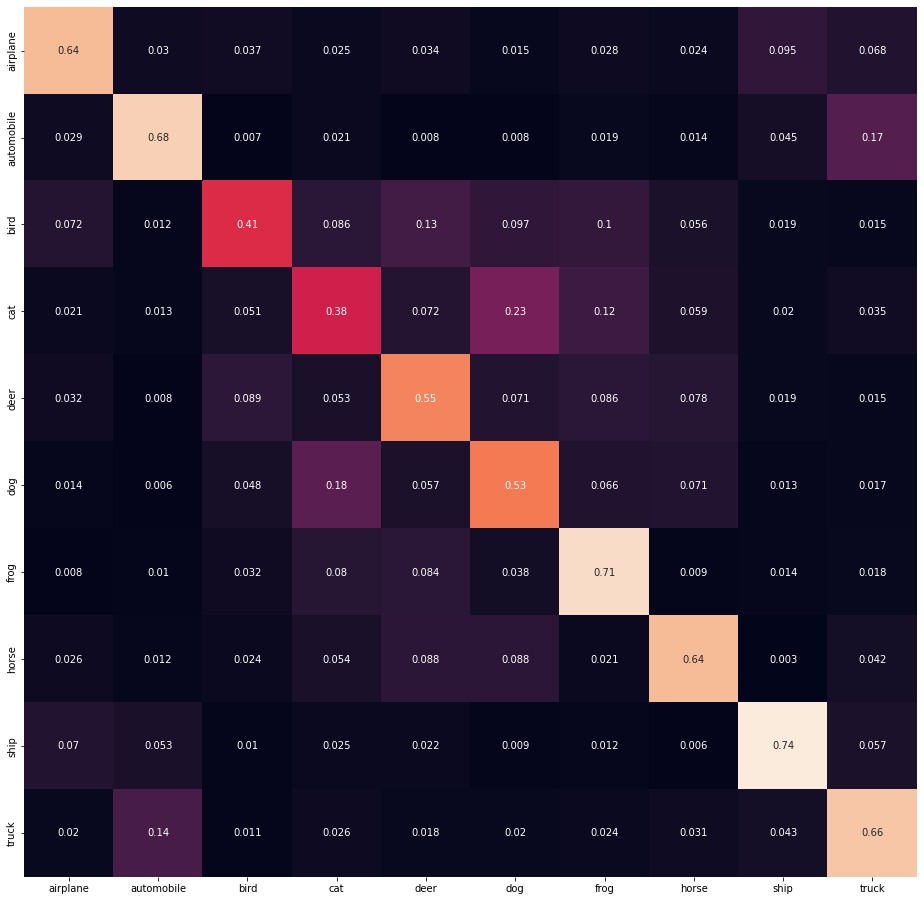

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/loss_function_categorical_crossentrpy')
[test_loss, test_accuracy] = model.evaluate(normalized_X_test, Y_test_one_hot)
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
predicted_Y_test = model.predict(normalized_X_test)
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

The model performs significantly better by using 'Categorical crossentropy' loss function. <br>
First, Categorical crossentropy is a better measure than MSE for classification, because the decision boundary in a classification task is large (in comparison with regression). MSE does not punish misclassifications enough but is the right loss for regression, where the distance between two values that can be predicted is small. <br>
Second, from a probabilistic point of view, Categorical crossentropy arises as the natural loss function to use if you have a sigmoid or softmax nonlinearity in the output layer of your network, and you want to maximize the likelihood of classifying the input data correctly. If instead you assume the target is continuous and normally distributed, and you maximize the likelihood of the output of the net under these assumptions, you get the MSE (combined with a linear output layer).

D) Optimizer = Adam

In [ ]:
input_shape = (32, 32, 3)
hidden_layer_1_size = 4096
hidden_layer_2_size = 1024
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='optimizer_adam')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(hidden_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dense(hidden_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "optimizer_adam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 4096)              12587008  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 4096)             16384     
 hNormalization)                                                 
                                                                 
 hidden_layer_2 (Dense)      (None, 1024)              4195328   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                    

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.025)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/optimizer_adam')

Epoch 1/100
160/160 [==============================] - 5s 26ms/step - loss: 2.3409 - accuracy: 0.2844 - val_loss: 1.6868 - val_accuracy: 0.3910 - lr: 0.0244
Epoch 2/100
160/160 [==============================] - 4s 22ms/step - loss: 1.7057 - accuracy: 0.3842 - val_loss: 1.6263 - val_accuracy: 0.4122 - lr: 0.0238
Epoch 3/100
160/160 [==============================] - 4s 23ms/step - loss: 1.6026 - accuracy: 0.4229 - val_loss: 1.5626 - val_accuracy: 0.4383 - lr: 0.0232
Epoch 4/100
160/160 [==============================] - 4s 22ms/step - loss: 1.5453 - accuracy: 0.4474 - val_loss: 1.4852 - val_accuracy: 0.4608 - lr: 0.0226
Epoch 5/100
160/160 [==============================] - 4s 22ms/step - loss: 1.5129 - accuracy: 0.4576 - val_loss: 1.4403 - val_accuracy: 0.4765 - lr: 0.0221
Epoch 6/100
160/160 [==============================] - 4s 23ms/step - loss: 1.4814 - accuracy: 0.4687 - val_loss: 1.4199 - val_accuracy: 0.4930 - lr: 0.0216
Epoch 7/100
160/160 [==============================] - 4s 

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/optimizer_adam/history.csv', mode='w') as f:
    hist_df.to_csv(f)

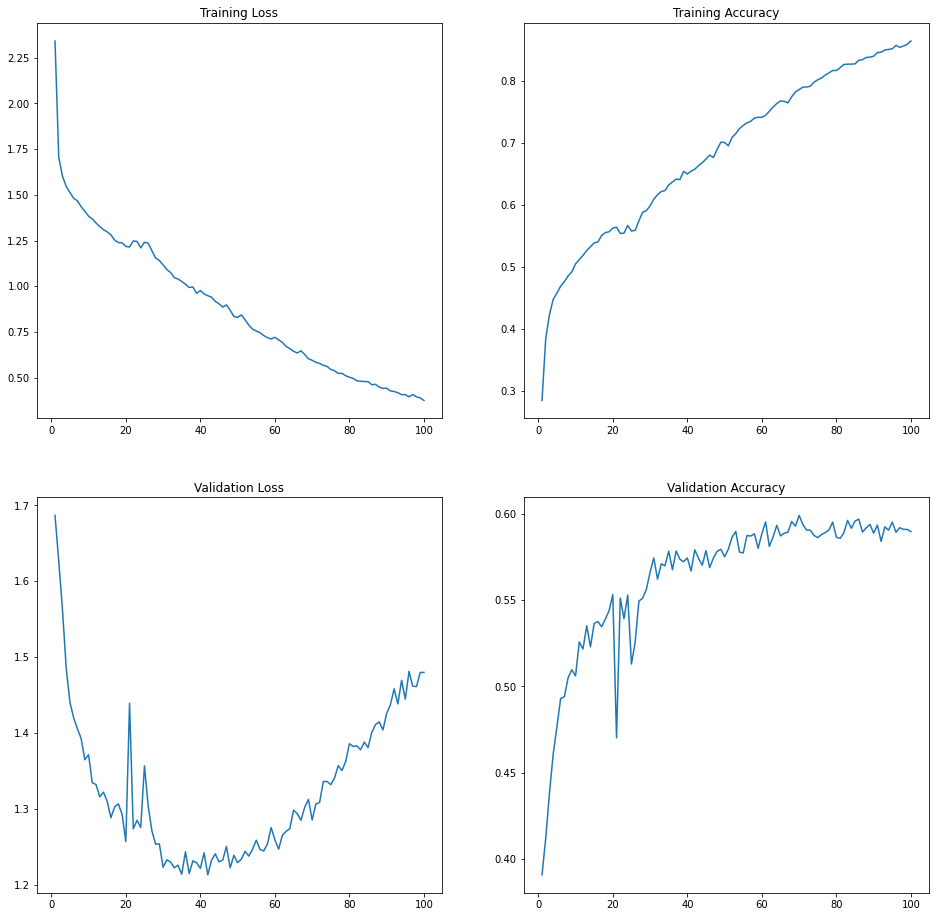

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/optimizer_adam/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

313/313 [==============================] - 2s 6ms/step - loss: 1.4746 - accuracy: 0.5926
Test Loss =  1.4746296405792236
Test Accuracy =  0.5925999879837036


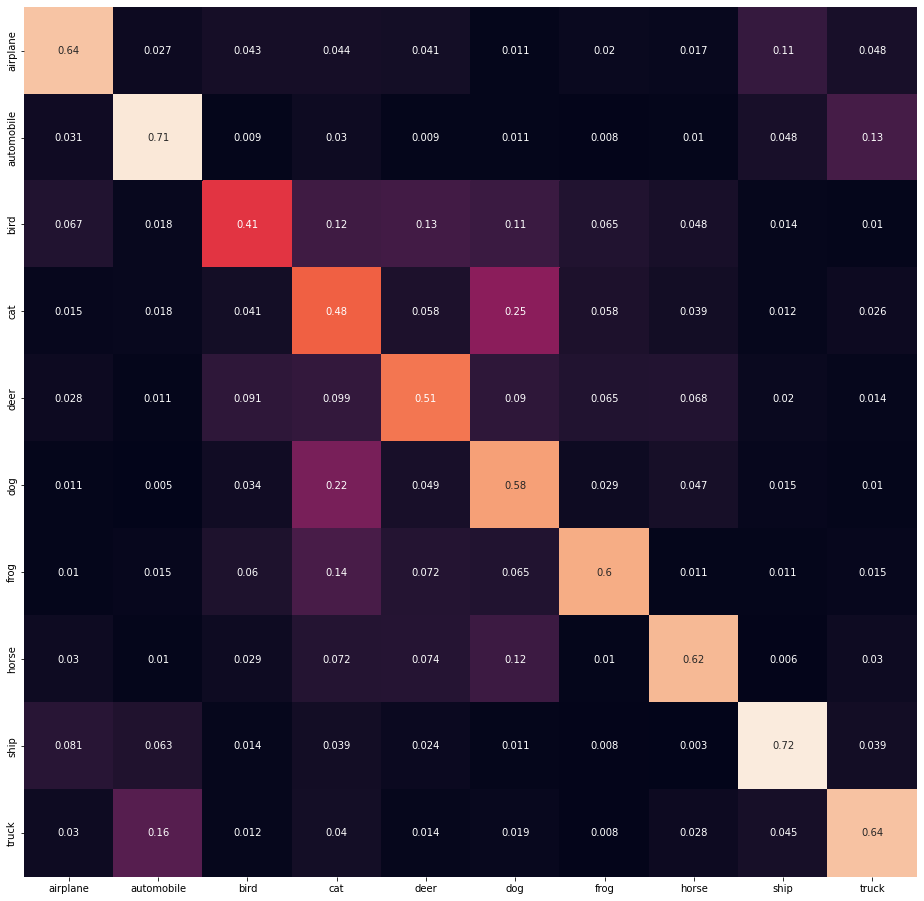

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/optimizer_adam')
[test_loss, test_accuracy] = model.evaluate(normalized_X_test, Y_test_one_hot)
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
predicted_Y_test = model.predict(normalized_X_test)
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

One interesting and dominant argument about optimizers is that SGD better generalizes than Adam. These papers argue that although Adam converges faster, SGD generalizes better than Adam and thus results in an improved final performance. By analysis, it has been found that SGD is more locally unstable and is more likely to converge to the minima at the flat or the asymmetric basins/valleys, which often have better generalization performance over other types of minima. <br>
Disadvantages of Adam -> <br> 1. It does not converge to an optimal solution in some areas (this is the motivation for AMSGrad). <br> 2. It can suffer a weight decay problem

E) Final MLP Model

In [ ]:
input_shape = (32, 32, 3)
hidden_layer_1_size = 4096
hidden_layer_2_size = 1024
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='final_MLP_model')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(hidden_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dense(hidden_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "final_MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 4096)              12587008  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 4096)             16384     
 hNormalization)                                                 
                                                                 
 hidden_layer_2 (Dense)      (None, 1024)              4195328   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                   

In [ ]:
class F_score(tf.keras.metrics.Metric):
  def __init__(self, **kwargs):
    super(F_score, self).__init__(**kwargs)
  def update_state(self, y_true, y_pred, sample_weight=None):
    self.confusion_matrix = tf.math.confusion_matrix(tf.math.argmax(y_true, axis=-1), tf.math.argmax(y_pred, axis=-1), number_of_classes)
    self.precision = tf.linalg.diag_part(tf.transpose(self.confusion_matrix)/tf.reshape(tf.math.reduce_sum(self.confusion_matrix, axis=0), (-1, 1)))
    self.recall = tf.linalg.diag_part(self.confusion_matrix/tf.reshape(tf.math.reduce_sum(self.confusion_matrix, axis=-1), (-1, 1)))
    self.F_score = 2*self.precision*self.precision/(self.precision+self.recall)
  def result(self):
    return tf.reduce_mean(self.F_score)
  def reset_state(self):
    self.confusion_matrix = None
    self.precision = None
    self.recall = None
    self.F_score = None
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall'), F_score(name='F_score')])

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/final_MLP_model')

Epoch 1/100
160/160 [==============================] - 7s 31ms/step - loss: 2.0790 - accuracy: 0.3310 - precision: 0.4243 - recall: 0.1855 - F_score: 0.4278 - val_loss: 1.7772 - val_accuracy: 0.4049 - val_precision: 0.5151 - val_recall: 0.2566 - val_F_score: 0.5239 - lr: 0.2439
Epoch 2/100
160/160 [==============================] - 4s 26ms/step - loss: 1.7581 - accuracy: 0.3926 - precision: 0.5244 - recall: 0.2353 - F_score: 0.4351 - val_loss: 1.5485 - val_accuracy: 0.4608 - val_precision: 0.6099 - val_recall: 0.2864 - val_F_score: nan - lr: 0.2380
Epoch 3/100
160/160 [==============================] - 4s 26ms/step - loss: 1.6551 - accuracy: 0.4259 - precision: 0.5539 - recall: 0.2663 - F_score: 0.4246 - val_loss: 1.4871 - val_accuracy: 0.4772 - val_precision: 0.6463 - val_recall: 0.3008 - val_F_score: 0.4537 - lr: 0.2321
Epoch 4/100
160/160 [==============================] - 4s 26ms/step - loss: 1.5894 - accuracy: 0.4425 - precision: 0.5815 - recall: 0.2895 - F_score: 0.4814 - val_los

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/final_MLP_model/history.csv', mode='w') as f:
    hist_df.to_csv(f)

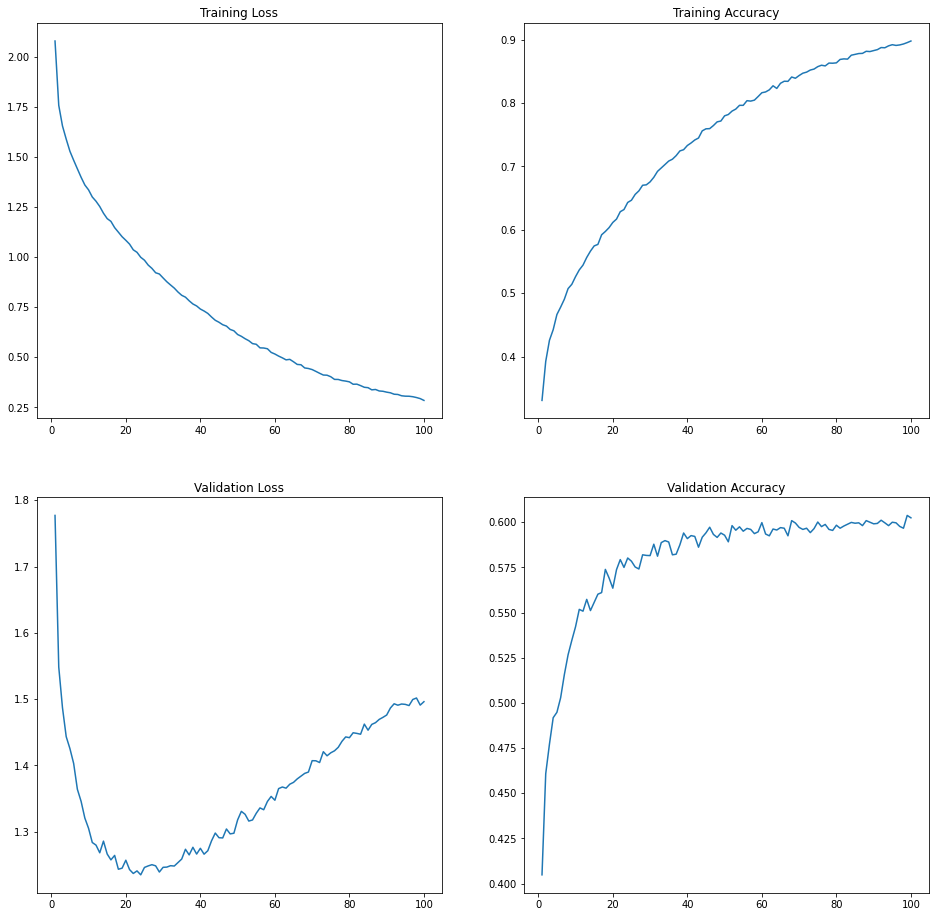

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/final_MLP_model/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

1/1 [==============================] - 1s 966ms/step - loss: 1.5034 - accuracy: 0.5911 - precision: 0.6328 - recall: 0.5572 - F_score: 0.5952
Test Loss =  1.5033763647079468
Test Accuracy =  0.5910999774932861
Test Precision =  0.6328222751617432
Test Recall =  0.557200014591217
Test F_score =  0.5952019875799783


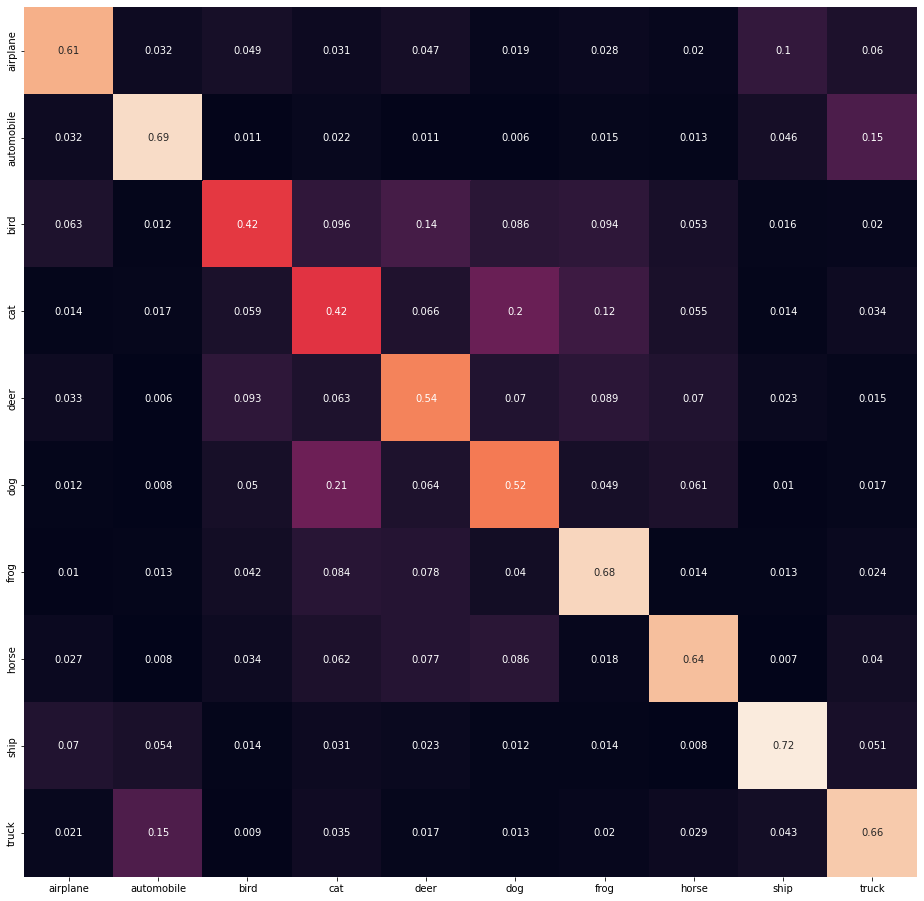

In [ ]:
class F_score(tf.keras.metrics.Metric):
  def __init__(self, **kwargs):
    super(F_score, self).__init__(**kwargs)
  def update_state(self, y_true, y_pred, sample_weight=None):
    self.confusion_matrix = tf.math.confusion_matrix(tf.math.argmax(y_true, axis=-1), tf.math.argmax(y_pred, axis=-1), number_of_classes)
    self.precision = tf.linalg.diag_part(tf.transpose(self.confusion_matrix)/tf.reshape(tf.math.reduce_sum(self.confusion_matrix, axis=0), (-1, 1)))
    self.recall = tf.linalg.diag_part(self.confusion_matrix/tf.reshape(tf.math.reduce_sum(self.confusion_matrix, axis=-1), (-1, 1)))
    self.F_score = 2*self.precision*self.precision/(self.precision+self.recall)
  def result(self):
    return tf.reduce_mean(self.F_score)
  def reset_state(self):
    self.confusion_matrix = None
    self.precision = None
    self.recall = None
    self.F_score = None
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/final_MLP_model', custom_objects={'F_score': F_score})
[test_loss, test_accuracy, test_precision, test_recall, test_F_score] = model.evaluate(normalized_X_test, Y_test_one_hot, batch_size=len(normalized_X_test))
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
print('Test Precision = ', test_precision)
print('Test Recall = ', test_recall)
print('Test F_score = ', test_F_score)
predicted_Y_test = model.predict(normalized_X_test, batch_size=len(normalized_X_test))
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

Best parameters: <br>
Batch-size = 256 <br>
Activation functions = 'ReLU' <br>
Loss dunction = 'Categorical-crossentropy' <br>
Optimizer = 'SGD'

F) If the number of samples in some of the classes of the train set be less than other classes, the model does not learn those classes well, and its performance weakens on them. <br>
Data Augmentation is one of the best ways for balancing the number of samples in different classes.

G) Imbalanced Dataset

In [ ]:
airplane_X = X_train[Y_train[:, 0] == 0]
bird_X = X_train[Y_train[:, 0] == 2]
rest_X = X_train[np.logical_and(Y_train[:, 0] != 0, Y_train[:, 0] != 2)]
airplane_Y = Y_train[Y_train[:, 0] == 0]
bird_Y = Y_train[Y_train[:, 0] == 2]
rest_Y = Y_train[np.logical_and(Y_train[:, 0] != 0, Y_train[:, 0] != 2)]
random_number = np.random.randint(1e9)
airplane_permutation = np.random.choice(range(airplane_X.shape[0]), int(airplane_X.shape[0]*0.5), False)
bird_permutation = np.random.choice(range(bird_X.shape[0]), int(bird_X.shape[0]*0.5), False)
imbalanced_X_train = np.vstack([rest_X, airplane_X[airplane_permutation], np.fliplr(airplane_X[airplane_permutation]), bird_X[bird_permutation], np.fliplr(bird_X[bird_permutation])])
imbalanced_Y_train = np.vstack([rest_Y, airplane_Y[airplane_permutation], airplane_Y[airplane_permutation], bird_Y[bird_permutation], bird_Y[bird_permutation]]).reshape(-1)
permutation = np.random.choice(range(imbalanced_X_train.shape[0]), imbalanced_X_train.shape[0], False)
imbalanced_X_train = imbalanced_X_train[permutation]
normalized_imbalanced_X_train = (imbalanced_X_train - np.mean(X_train, axis=0)) / (1e-3 + np.sqrt(np.var(X_train, axis=0)))
imbalanced_Y_train = imbalanced_Y_train[permutation]
imbalanced_Y_train_one_hot = tf.one_hot(imbalanced_Y_train, number_of_classes)

In [ ]:
input_shape = (32, 32, 3)
hidden_layer_1_size = 4096
hidden_layer_2_size = 1024
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='imbalanced_dataset_airplane_and_bird')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(hidden_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dense(hidden_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "imbalanced_dataset_airplane_and_bird"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 4096)              12587008  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 4096)             16384     
 hNormalization)                                                 
                                                                 
 hidden_layer_2 (Dense)      (None, 1024)              4195328   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                              

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
class F_score(tf.keras.metrics.Metric):
  def __init__(self, **kwargs):
    super(F_score, self).__init__(**kwargs)
  def update_state(self, y_true, y_pred, sample_weight=None):
    self.confusion_matrix = tf.math.confusion_matrix(tf.math.argmax(y_true, axis=-1), tf.math.argmax(y_pred, axis=-1), number_of_classes)
    self.precision = tf.linalg.diag_part(tf.transpose(self.confusion_matrix)/tf.reshape(tf.math.reduce_sum(self.confusion_matrix, axis=0), (-1, 1)))
    self.recall = tf.linalg.diag_part(self.confusion_matrix/tf.reshape(tf.math.reduce_sum(self.confusion_matrix, axis=-1), (-1, 1)))
    self.F_score = 2*self.precision*self.precision/(self.precision+self.recall)
  def result(self):
    return tf.reduce_mean(self.F_score)
  def reset_state(self):
    self.confusion_matrix = None
    self.precision = None
    self.recall = None
    self.F_score = None
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall'), F_score(name='F_score')])

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_imbalanced_X_train, imbalanced_Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/imbalanced_dataset_airplane_and_bird')

Epoch 1/100
160/160 [==============================] - 15s 45ms/step - loss: 2.0534 - accuracy: 0.3415 - precision: 0.4428 - recall: 0.1957 - F_score: 0.4521 - val_loss: 1.7077 - val_accuracy: 0.4175 - val_precision: 0.5444 - val_recall: 0.2649 - val_F_score: nan - lr: 0.2439
Epoch 2/100
160/160 [==============================] - 6s 37ms/step - loss: 1.7434 - accuracy: 0.4019 - precision: 0.5292 - recall: 0.2424 - F_score: 0.3865 - val_loss: 1.5513 - val_accuracy: 0.4501 - val_precision: 0.6118 - val_recall: 0.2654 - val_F_score: nan - lr: 0.2380
Epoch 3/100
160/160 [==============================] - 6s 37ms/step - loss: 1.6417 - accuracy: 0.4339 - precision: 0.5693 - recall: 0.2747 - F_score: 0.4151 - val_loss: 1.5470 - val_accuracy: 0.4618 - val_precision: 0.6003 - val_recall: 0.3038 - val_F_score: nan - lr: 0.2321
Epoch 4/100
160/160 [==============================] - 6s 36ms/step - loss: 1.5721 - accuracy: 0.4516 - precision: 0.5929 - recall: 0.3009 - F_score: 0.4085 - val_loss: 1.

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/imbalanced_dataset_airplane_and_bird/history.csv', mode='w') as f:
    hist_df.to_csv(f)

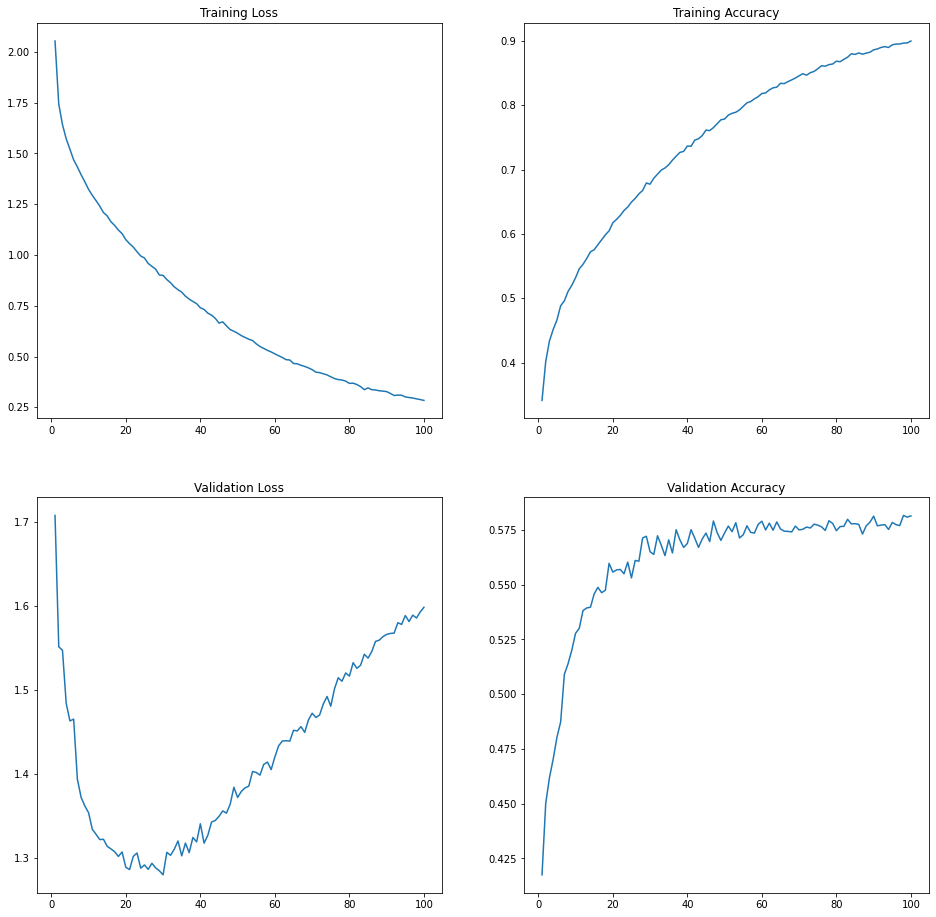

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/imbalanced_dataset_airplane_and_bird/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

1/1 [==============================] - 1s 783ms/step - loss: 1.5837 - accuracy: 0.5811 - precision: 0.6229 - recall: 0.5453 - F_score: 0.5832
Test Loss =  1.583741545677185
Test Accuracy =  0.5810999870300293
Test Precision =  0.6229152679443359
Test Recall =  0.5453000068664551
Test F_score =  0.5832015997318754


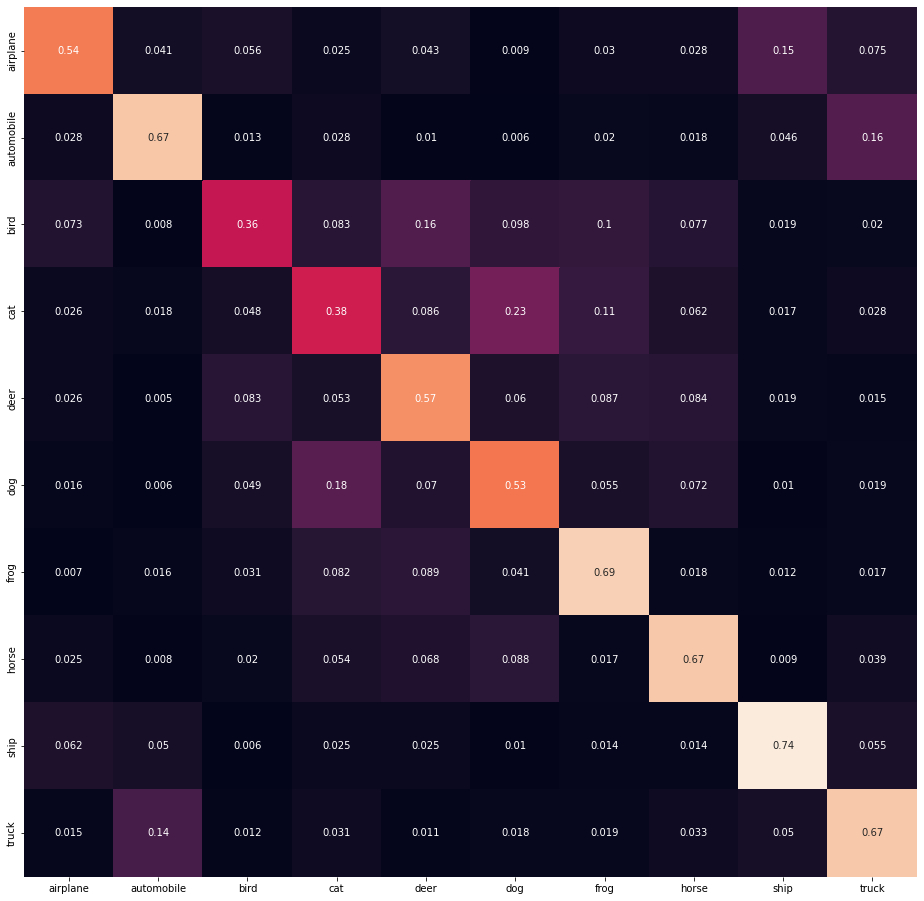

In [ ]:
class F_score(tf.keras.metrics.Metric):
  def __init__(self, **kwargs):
    super(F_score, self).__init__(**kwargs)
  def update_state(self, y_true, y_pred, sample_weight=None):
    self.confusion_matrix = tf.math.confusion_matrix(tf.math.argmax(y_true, axis=-1), tf.math.argmax(y_pred, axis=-1), number_of_classes)
    self.precision = tf.linalg.diag_part(tf.transpose(self.confusion_matrix)/tf.reshape(tf.math.reduce_sum(self.confusion_matrix, axis=0), (-1, 1)))
    self.recall = tf.linalg.diag_part(self.confusion_matrix/tf.reshape(tf.math.reduce_sum(self.confusion_matrix, axis=-1), (-1, 1)))
    self.F_score = 2*self.precision*self.precision/(self.precision+self.recall)
  def result(self):
    return tf.reduce_mean(self.F_score)
  def reset_state(self):
    self.confusion_matrix = None
    self.precision = None
    self.recall = None
    self.F_score = None
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/imbalanced_dataset_airplane_and_bird', custom_objects={'F_score': F_score})
[test_loss, test_accuracy, test_precision, test_recall, test_F_score] = model.evaluate(normalized_X_test, Y_test_one_hot, batch_size=len(normalized_X_test))
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
print('Test Precision = ', test_precision)
print('Test Recall = ', test_recall)
print('Test F_score = ', test_F_score)
predicted_Y_test = model.predict(normalized_X_test, batch_size=len(normalized_X_test))
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

CNN

A) CNN

In [ ]:
input_shape = (32, 32, 3)
Conv_layer_1_size = 32
Conv_layer_2_size = 32
Conv_layer_3_size = 64
Conv_layer_4_size = 64
Conv_layer_5_size = 128
Conv_layer_6_size = 128
FC_layer_1_size = 512
FC_layer_2_size = 128
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='MLP_and_CNN')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Conv2D(Conv_layer_1_size, (5, 5), strides=(1, 1), padding='same', activation='relu', name='con_layer_1'))
model.add(tf.keras.layers.Conv2D(Conv_layer_2_size, (5, 5), strides=(2, 2), padding='same', activation='relu', name='con_layer_2'))
model.add(tf.keras.layers.Conv2D(Conv_layer_3_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_3'))
model.add(tf.keras.layers.Conv2D(Conv_layer_4_size, (3, 3), strides=(2, 2), padding='same', activation='relu', name='con_layer_4'))
model.add(tf.keras.layers.Conv2D(Conv_layer_5_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_5'))
model.add(tf.keras.layers.Conv2D(Conv_layer_6_size, (3, 3), strides=(2, 2), padding='same', activation='relu', name='con_layer_6'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(FC_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.Dense(FC_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "MLP_and_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 con_layer_1 (Conv2D)        (None, 32, 32, 32)        2432      
                                                                 
 con_layer_2 (Conv2D)        (None, 16, 16, 32)        25632     
                                                                 
 con_layer_3 (Conv2D)        (None, 16, 16, 64)        18496     
                                                                 
 con_layer_4 (Conv2D)        (None, 8, 8, 64)          36928     
                                                                 
 con_layer_5 (Conv2D)        (None, 8, 8, 128)         73856     
                                                                 
 con_layer_6 (Conv2D)        (None, 4, 4, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 2048)              

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN')

Epoch 1/100
160/160 [==============================] - 15s 75ms/step - loss: 2.1792 - accuracy: 0.2258 - val_loss: 2.0590 - val_accuracy: 0.2176 - lr: 0.2439
Epoch 2/100
160/160 [==============================] - 11s 66ms/step - loss: 1.9064 - accuracy: 0.2886 - val_loss: 2.0877 - val_accuracy: 0.2134 - lr: 0.2380
Epoch 3/100
160/160 [==============================] - 10s 64ms/step - loss: 1.8313 - accuracy: 0.3102 - val_loss: 2.6408 - val_accuracy: 0.1492 - lr: 0.2321
Epoch 4/100
160/160 [==============================] - 10s 62ms/step - loss: 1.7446 - accuracy: 0.3447 - val_loss: 2.3671 - val_accuracy: 0.2033 - lr: 0.2265
Epoch 5/100
160/160 [==============================] - 10s 64ms/step - loss: 1.6362 - accuracy: 0.3894 - val_loss: 2.2943 - val_accuracy: 0.2304 - lr: 0.2210
Epoch 6/100
160/160 [==============================] - 10s 62ms/step - loss: 1.5180 - accuracy: 0.4392 - val_loss: 1.6165 - val_accuracy: 0.4162 - lr: 0.2156
Epoch 7/100
160/160 [==============================]

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN/history.csv', mode='w') as f:
    hist_df.to_csv(f)

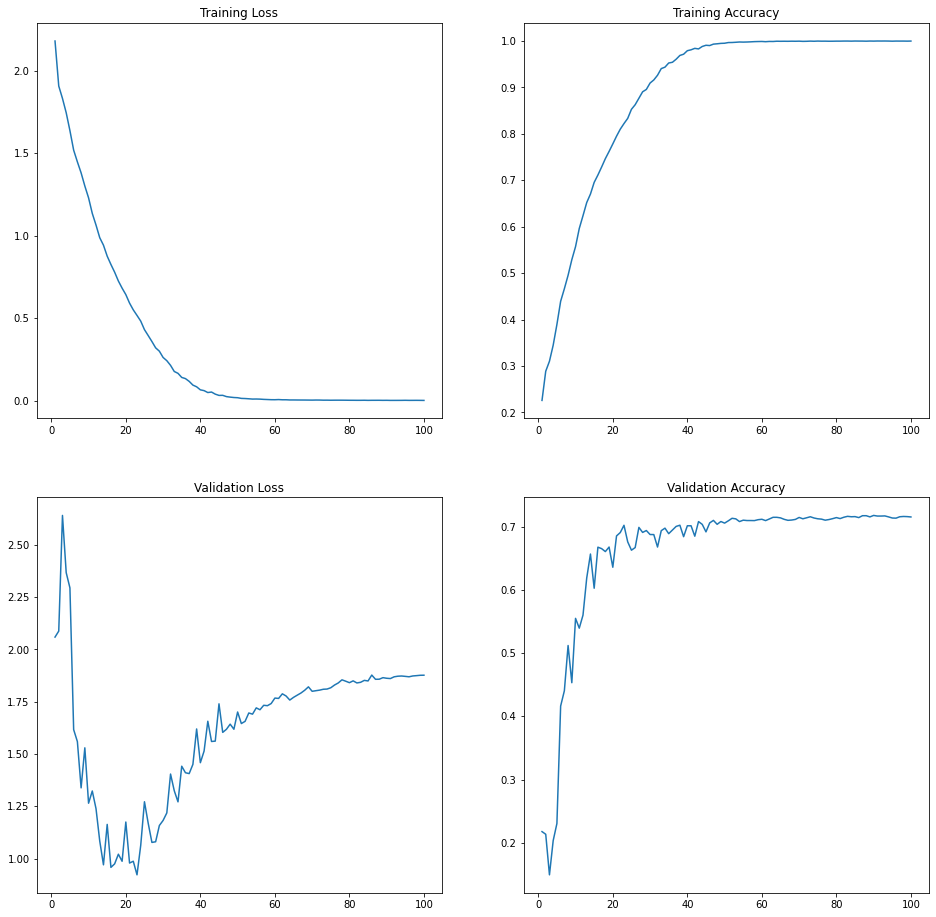

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

313/313 [==============================] - 3s 8ms/step - loss: 1.8576 - accuracy: 0.7158
Test Loss =  1.8575929403305054
Test Accuracy =  0.7157999873161316


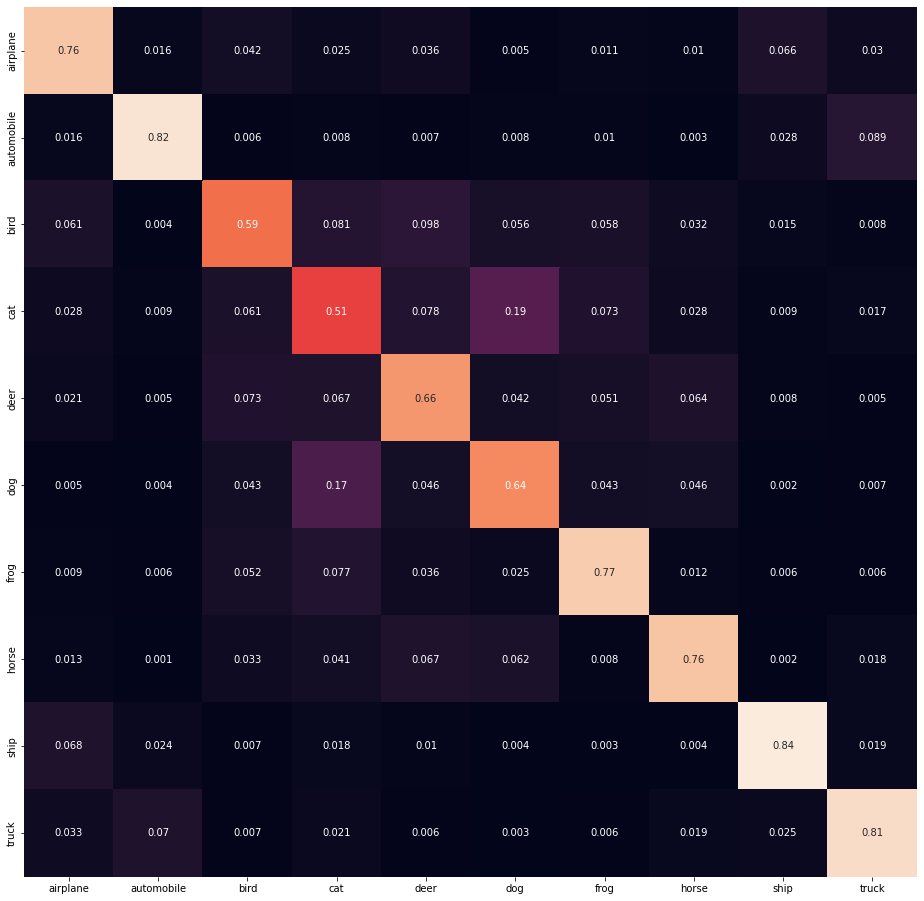

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN')
[test_loss, test_accuracy] = model.evaluate(normalized_X_test, Y_test_one_hot)
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
predicted_Y_test = model.predict(normalized_X_test)
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

Both MLP and CNN models can be used for image classification. However, since CNN takes a tensor as input, it can understand better the spatial relation between pixels of images. Thus for complicated images, CNN will perform better than MLP. <br>
Clearly, using convolutional layers significantly decreases the loss and increases the accuracy.

B) CNN With Batch Normalization

In [ ]:
input_shape = (32, 32, 3)
Conv_layer_1_size = 32
Conv_layer_2_size = 32
Conv_layer_3_size = 64
Conv_layer_4_size = 64
Conv_layer_5_size = 128
Conv_layer_6_size = 128
FC_layer_1_size = 512
FC_layer_2_size = 128
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='MLP_and_CNN_with_batch_normalization_and_pooling')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Conv2D(Conv_layer_1_size, (5, 5), strides=(1, 1), padding='same', activation='relu', name='con_layer_1'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_1'))
model.add(tf.keras.layers.Conv2D(Conv_layer_2_size, (5, 5), strides=(1, 1), padding='same', activation='relu', name='con_layer_2'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_2'))
model.add(tf.keras.layers.Conv2D(Conv_layer_3_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_3'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_3'))
model.add(tf.keras.layers.Conv2D(Conv_layer_4_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_4'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_4'))
model.add(tf.keras.layers.Conv2D(Conv_layer_5_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_5'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_5'))
model.add(tf.keras.layers.Conv2D(Conv_layer_6_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_6'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_6'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(FC_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.Dense(FC_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "MLP_and_CNN_with_batch_normalization_and_pooling"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 con_layer_1 (Conv2D)        (None, 32, 32, 32)        2432      
                                                                 
 conv_batch_normalization_1   (None, 32, 32, 32)       128       
 (BatchNormalization)                                            
                                                                 
 con_layer_2 (Conv2D)        (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv_batch_normalization_2   (None, 16, 16, 32)       128       
 (BatchNormalization)                                            
                  

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN_with_batch_normalization_and_pooling')

Epoch 1/100
160/160 [==============================] - 14s 81ms/step - loss: 1.7638 - accuracy: 0.3762 - val_loss: 1.4340 - val_accuracy: 0.4731 - lr: 0.2439
Epoch 2/100
160/160 [==============================] - 12s 77ms/step - loss: 1.3501 - accuracy: 0.5114 - val_loss: 1.3342 - val_accuracy: 0.5356 - lr: 0.2380
Epoch 3/100
160/160 [==============================] - 12s 77ms/step - loss: 1.1486 - accuracy: 0.5891 - val_loss: 1.0207 - val_accuracy: 0.6379 - lr: 0.2321
Epoch 4/100
160/160 [==============================] - 12s 77ms/step - loss: 0.9930 - accuracy: 0.6522 - val_loss: 0.9845 - val_accuracy: 0.6529 - lr: 0.2265
Epoch 5/100
160/160 [==============================] - 12s 77ms/step - loss: 0.8684 - accuracy: 0.6977 - val_loss: 0.8719 - val_accuracy: 0.6988 - lr: 0.2210
Epoch 6/100
160/160 [==============================] - 12s 77ms/step - loss: 0.7694 - accuracy: 0.7339 - val_loss: 0.7844 - val_accuracy: 0.7260 - lr: 0.2156
Epoch 7/100
160/160 [==============================]

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN_with_batch_normalization_and_pooling/history.csv', mode='w') as f:
    hist_df.to_csv(f)

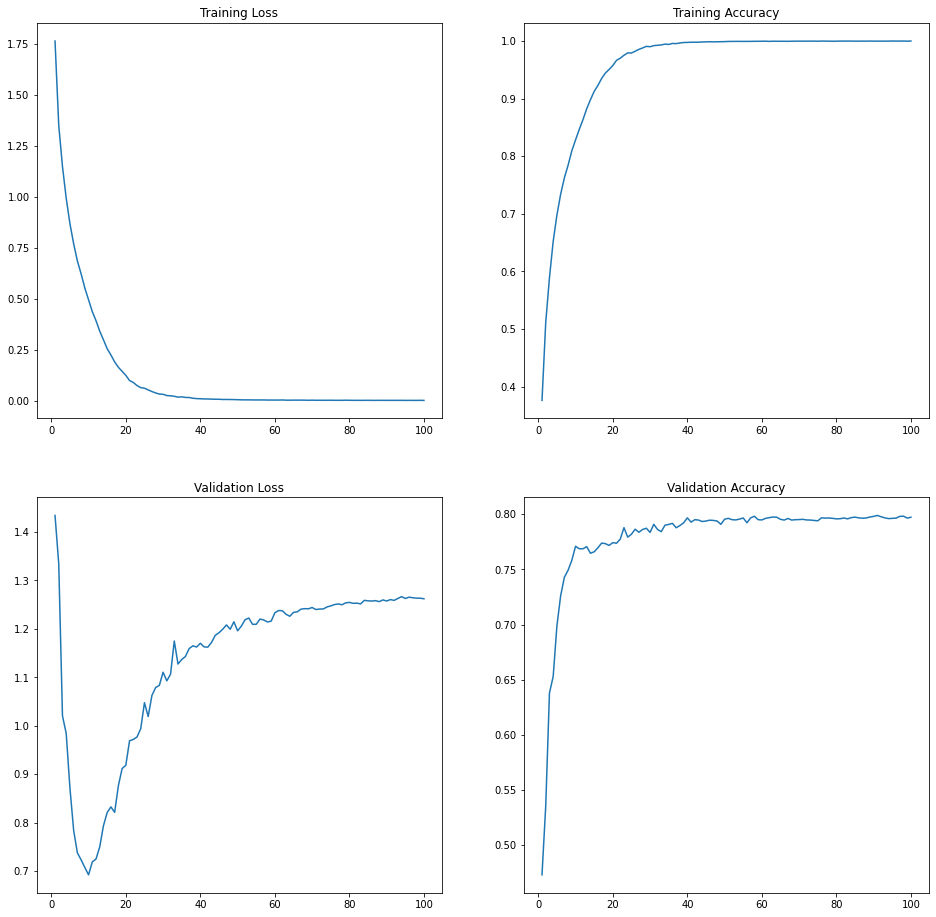

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN_with_batch_normalization_and_pooling/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

313/313 [==============================] - 4s 11ms/step - loss: 1.2494 - accuracy: 0.8014
Test Loss =  1.249398946762085
Test Accuracy =  0.8014000058174133


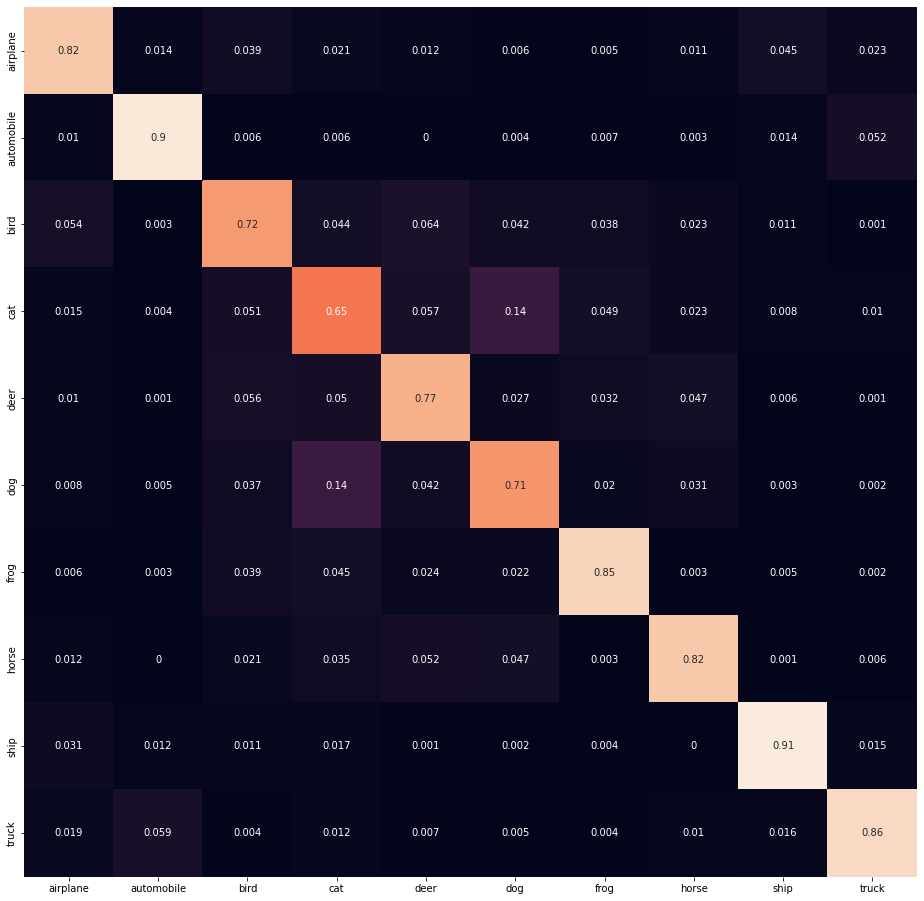

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN_with_batch_normalization_and_pooling')
[test_loss, test_accuracy] = model.evaluate(normalized_X_test, Y_test_one_hot)
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
predicted_Y_test = model.predict(normalized_X_test)
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

Batch normalization layers provides an elegant way of reparametrizing almost any deep neural network. The reparametrization significantly reduces the problem of coordinating updates across many layers. This is done by scaling the output of each layer, specifically by standardizing the activations of each input variable of the next layer per mini-batch. Standardizing the activations of the prior layer means that assumptions the subsequent layer makes about the spread and distribution of inputs during the weight update will not change, at least not dramatically. This has the effect of stabilizing and speeding up the training process of deep neural networks. <br>
Pooling layers provide an approach to downsample feature maps by summarizing the presence of features in patches of the feature map. Two common pooling methods are max pooling and average pooling. <br>
Average pooling: Calculate the average value for each patch of the feature map. <br>
Max pooling: Calculate the maximum value for each patch of the feature map. <br>
Using batch normalization and pooling layers decreases the loss and increases the accuracy.

C) CNN With Batch Normalization and Dropout

In [ ]:
input_shape = (32, 32, 3)
Conv_layer_1_size = 32
Conv_layer_2_size = 32
Conv_layer_3_size = 64
Conv_layer_4_size = 64
Conv_layer_5_size = 128
Conv_layer_6_size = 128
FC_layer_1_size = 512
FC_layer_2_size = 128
output_size = number_of_classes
batch_size = 256
number_of_epochs = 100

In [ ]:
model = tf.keras.models.Sequential(name='MLP_and_CNN_with_batch_normalization_pooling_and_dropout')
model.add(tf.keras.Input(shape=input_shape, name='input'))
model.add(tf.keras.layers.Conv2D(Conv_layer_1_size, (5, 5), strides=(1, 1), padding='same', activation='relu', name='con_layer_1'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_1'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_1'))
model.add(tf.keras.layers.Conv2D(Conv_layer_2_size, (5, 5), strides=(1, 1), padding='same', activation='relu', name='con_layer_2'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_2'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_2'))
model.add(tf.keras.layers.Conv2D(Conv_layer_3_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_3'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_3'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_3'))
model.add(tf.keras.layers.Conv2D(Conv_layer_4_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_4'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_4'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_4'))
model.add(tf.keras.layers.Conv2D(Conv_layer_5_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_5'))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_5'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_5'))
model.add(tf.keras.layers.Conv2D(Conv_layer_6_size, (3, 3), strides=(1, 1), padding='same', activation='relu', name='con_layer_6'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(name='conv_batch_normalization_6'))
model.add(tf.keras.layers.Dropout(0.25, name='conv_dropout_6'))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(FC_layer_1_size, activation='relu', name='hidden_layer_1'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_1'))
model.add(tf.keras.layers.Dense(FC_layer_2_size, activation='relu', name='hidden_layer_2'))
model.add(tf.keras.layers.BatchNormalization(name='batch_normalization_2'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout_2'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "MLP_and_CNN_with_batch_normalization_pooling_and_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 con_layer_1 (Conv2D)        (None, 32, 32, 32)        2432      
                                                                 
 conv_batch_normalization_1   (None, 32, 32, 32)       128       
 (BatchNormalization)                                            
                                                                 
 conv_dropout_1 (Dropout)    (None, 32, 32, 32)        0         
                                                                 
 con_layer_2 (Conv2D)        (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv_batc

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.025
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(normalized_X_train, Y_train_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(normalized_X_validation, Y_validation_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN_with_batch_normalization_pooling_and_dropout')

Epoch 1/100
160/160 [==============================] - 15s 85ms/step - loss: 1.8890 - accuracy: 0.3374 - val_loss: 1.7063 - val_accuracy: 0.4015 - lr: 0.2439
Epoch 2/100
160/160 [==============================] - 13s 82ms/step - loss: 1.5117 - accuracy: 0.4452 - val_loss: 1.3639 - val_accuracy: 0.4946 - lr: 0.2380
Epoch 3/100
160/160 [==============================] - 13s 82ms/step - loss: 1.3873 - accuracy: 0.4960 - val_loss: 1.3024 - val_accuracy: 0.5227 - lr: 0.2321
Epoch 4/100
160/160 [==============================] - 13s 82ms/step - loss: 1.2789 - accuracy: 0.5386 - val_loss: 1.1822 - val_accuracy: 0.5716 - lr: 0.2265
Epoch 5/100
160/160 [==============================] - 13s 82ms/step - loss: 1.1816 - accuracy: 0.5752 - val_loss: 1.0392 - val_accuracy: 0.6244 - lr: 0.2210
Epoch 6/100
160/160 [==============================] - 13s 82ms/step - loss: 1.0972 - accuracy: 0.6080 - val_loss: 1.1284 - val_accuracy: 0.5999 - lr: 0.2156
Epoch 7/100
160/160 [==============================]

In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN_with_batch_normalization_pooling_and_dropout/history.csv', mode='w') as f:
    hist_df.to_csv(f)

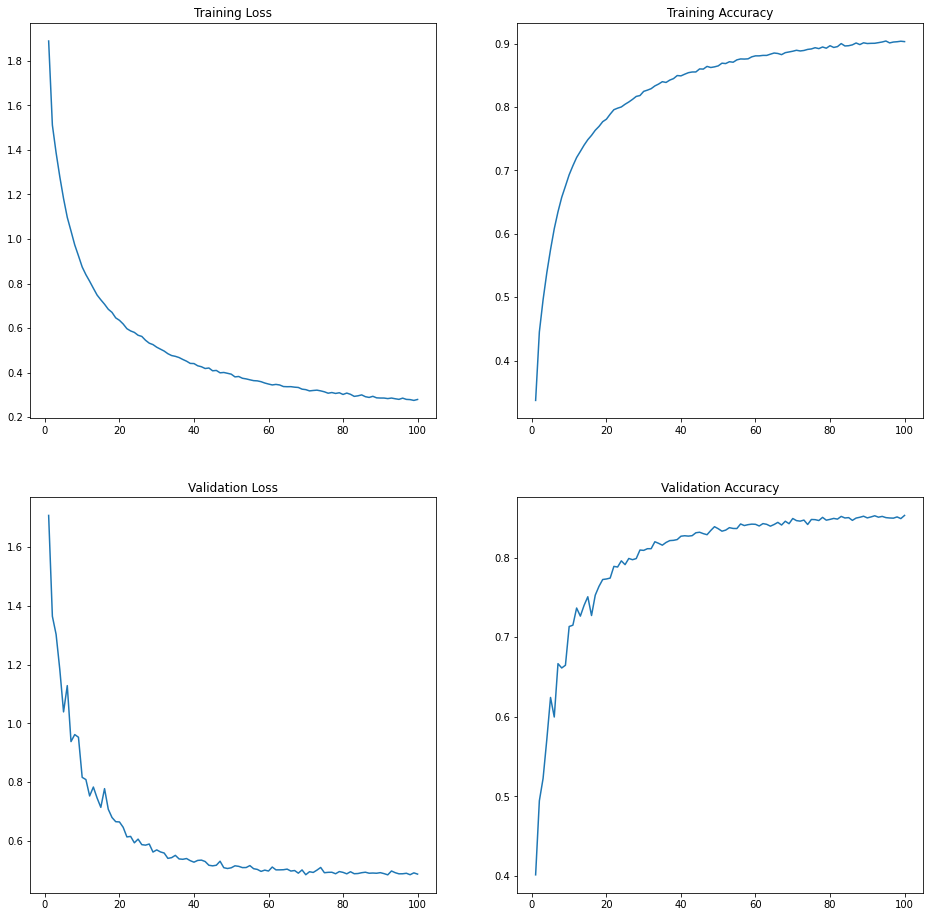

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN_with_batch_normalization_pooling_and_dropout/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 101), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 101), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 101), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 101), history['val_accuracy'])

313/313 [==============================] - 4s 10ms/step - loss: 0.4912 - accuracy: 0.8512
Test Loss =  0.4912361800670624
Test Accuracy =  0.8511999845504761


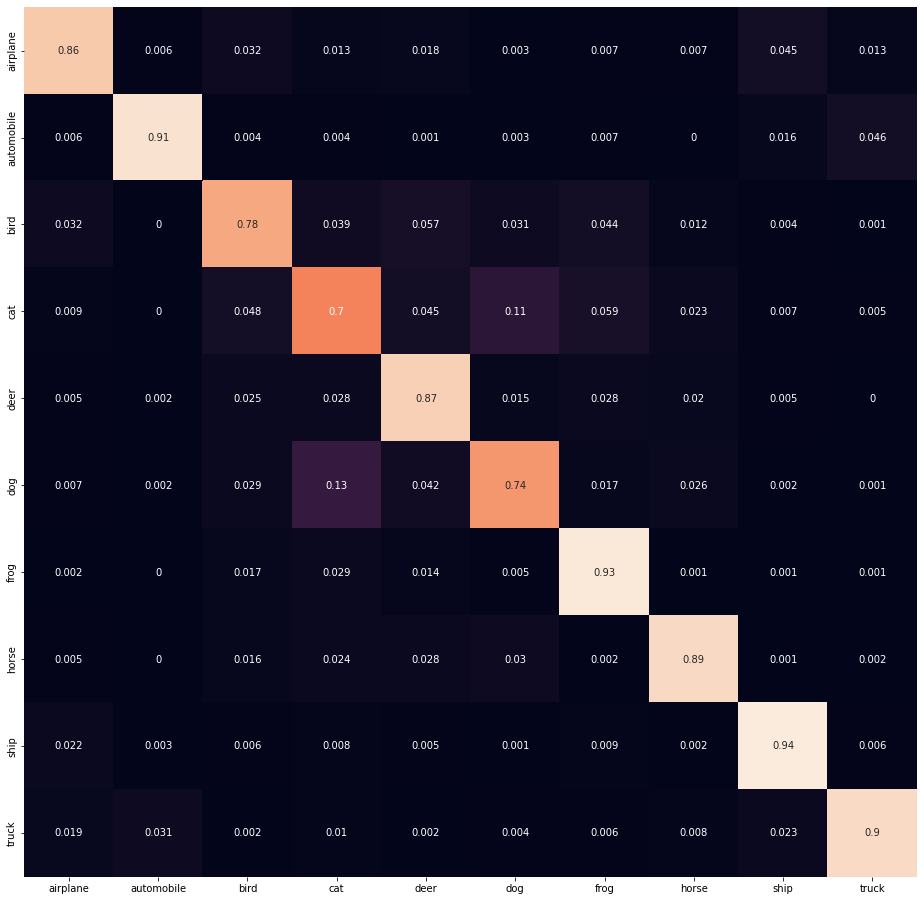

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/MLP_and_CNN_with_batch_normalization_pooling_and_dropout')
[test_loss, test_accuracy] = model.evaluate(normalized_X_test, Y_test_one_hot)
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)
predicted_Y_test = model.predict(normalized_X_test)
confusion_matrix = tf.math.confusion_matrix(Y_test, np.argmax(predicted_Y_test, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)

Using dropout decreases the loss, increases the accuracy, and also prevents the model from overfitting. <br>
The main advantage of this method is that it prevents all neurons in a layer from synchronously optimizing their weights. This adaptation, made in random groups, prevents all the neurons from converging to the same goal, thus decorrelating the weights and preventing the model from overfitting. <br>
A second property discovered for the application of dropout is that the activations of the hidden units become sparse, which is also a desirable characteristic.